In [1]:
# add module
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from core.environments.utils import ascii_list_to_array, ascii_array_to_rgb_array, ascii_array_to_str, ascii_dict_to_color_array
from core.environments.wolfpack.constants import WOLFPACK_MAP, WOLFPACK_COLOR
from core.environments.wolfpack.env import Wolfpack
import numpy as np
from gymnasium.utils import seeding
from PIL import Image

pygame 2.3.0 (SDL 2.24.2, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
rng, _ = seeding.np_random(114514)
a = Wolfpack(rng, )
a.render_mode = 'rgb_array'

In [4]:
a.render_on

False

@ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @
@                                     @
@             @ @         @           @
@ @ @ U         @ @ P       @         @
@     _             _                 @
@                                 @   @
@               @ @             @     @
@   @ @ @                     @       @
@   @ @ @                             @
@                   @ @ @             @
@         @           @       @       @
@       @ @             _   @ @       @
@         @ @           V @ @         @
@                                     @
@                       @           @ @
@       @ @           @ @ @         @ @
@     @ @ @             @ @ @       @ @
@       @                             @
@                       @             @
@ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @ @


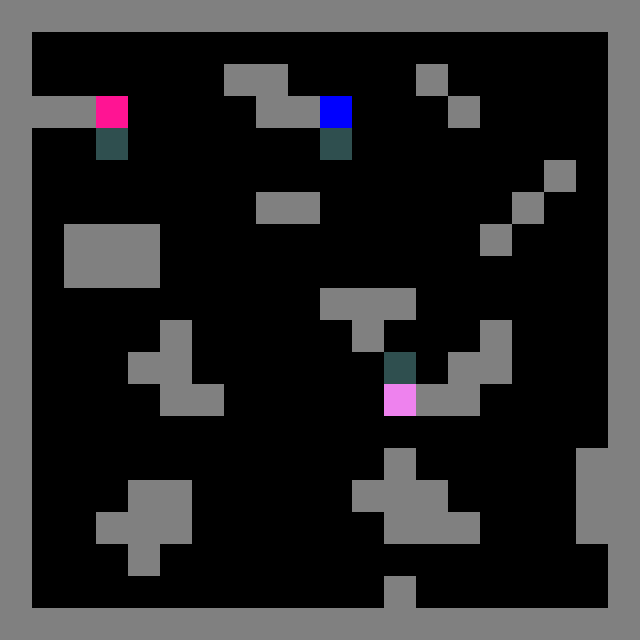

In [5]:
a.reset()
print(ascii_array_to_str(a.grid_world()))
Image.fromarray(a.render())

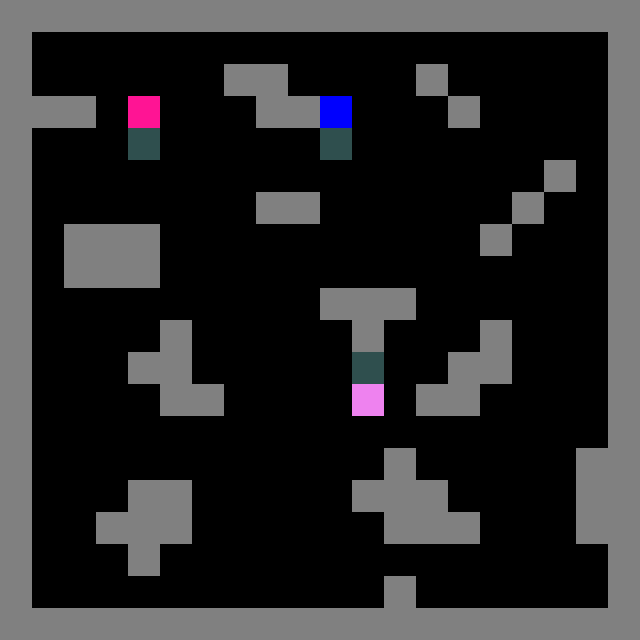

In [6]:
out = a.step(dict(zip(a.agents, np.random.choice(6, size=(3,)).tolist())))
output = a.grid_world()
# print(output)
rgb = ascii_array_to_rgb_array(output, a.ascii_color_array)
img = Image.fromarray(a.render())
display(img,)

In [7]:
from pettingzoo.test import parallel_api_test
from pettingzoo.butterfly import cooperative_pong_v5
from core.environments.wolfpack.env import WolfpackEnv
env = WolfpackEnv()

In [8]:
%%timeit
parallel_api_test(env, num_cycles=100000000) # test OK!   

668 ms ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# To use this env in rllib, DO:

In [9]:
from ray.tune.registry import register_env
from ray.rllib.env import PettingZooEnv
from core.environments.wolfpack.env import wolfpack_env_creator

config_template = {
    'r_lone': 1.0,
    'r_team': 5.0,
    'r_prey': 0.1,
    'max_cycles': 1024,
}

# first register environment
register_env('wolfpack', lambda config: PettingZooEnv(wolfpack_env_creator(config)))

## then in algorithm configuration

```python
from ray.tune.registry import get_trainable_cls

config = (
    get_trainable_cls(args.run).get_default_config()
    # or "corridor" if registered above
    .environment(
        'Wolfpack',
        env_config=config_template,
    ).framework(args.framework).rollouts(num_rollout_workers=1).training(model={
        "custom_model": "my_model",
        "vf_share_layers": True,
    }))

# I am not so sure
```

In [ ]:
# from ray.rllib.algorithms.qmix import QMixConfig
# from ray.rllib.algorithms import ppo